## Optimizacion y evaluacion de modelos

Vamos a trabajar sobre lo que ya trabajamos en el Dataset de Paltas. Para eso, primero vamos a seleccionar los datos de Paltas convencionales de Chicago siguiendo exactamente los mismos pasos que la clase 18.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

sns.set()

In [3]:
palta = pd.read_csv('Datasets/avocado.csv', delimiter=',', parse_dates=["Date"])

palta.drop('Unnamed: 0', axis = 1, inplace = True)
palta.sort_values("Date", inplace = True)
palta.reset_index(inplace = True, drop  = True)

palta_chicago = palta[palta.region == 'Chicago']
palta_chicago.reset_index(inplace = True, drop = True)
palta_chicago['Date']=palta_chicago['Date'].map(dt.datetime.toordinal)
palta_chicago_convencional = palta_chicago[palta_chicago.type == 'conventional']

X = palta_chicago_convencional.Date.values.reshape(-1,1)
y = palta_chicago_convencional.AveragePrice.values  

C:\Users\user\Anaconda3\envs\DataScienceAC\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Antes de empezar a trabajar, vamos a separar nuestros datos en el conjunto de datos de entrenamiento y el de Held-out.

In [ ]:
### importar de Sckit-learn la funcion "train_test_split"
### Separar los datos de entrenamiento y Held-out utilizando la funcion que acabamos de importar. 

### IMPORTAR
X_train, X_test, y_train, y_test = #COMPLETAR

In [4]:
# RESPUESTA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [12]:
### Para realizar el gridsearch, seguir los siguientes pasos:
### 1) Importa la funcion "DecisionTreeRegressor"
### 2) Cargar un DecisionTreeRegressor en la variable "rgr_tree"
### 3) En la variable diccionario "parameters" especificar qué valores 
### son en los que queremos realizar el Grid Search (sólo tenes que completar la ayuda!)
### 4) Ejecutar el Grid search. Buscá en internet qué significa la variable cv y completá. 

from sklearn.model_selection import GridSearchCV
### IMPORTAR

#rgr_tree = ### COMPLETAR
#parameters = {'criterion':['mae', 'mse'], 'max_depth':###completar  con una lista de numeros}
#clf = GridSearchCV(rgr_tree, parameters, cv=### completar)


In [6]:
### RESPUESTA
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


rgr_tree = DecisionTreeRegressor()
parameters = {'criterion':['mae', 'mse'], 'max_depth':[2,5,7,10,15,20]}
clf = GridSearchCV(rgr_tree, parameters, cv=5,return_train_score=True)


In [13]:
GridSearchCV?

In [7]:
#Una vez que determinamos cuales son los parametros de busqueda, vamos a entrenar el gridsearch con los datos 
# de entrenamiento.Solamente tenes que ejecutar esta celda.

clf.fit(X_train, y_train)

C:\Users\user\Anaconda3\envs\DataScienceAC\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mae', 'mse'],
                         'max_depth': [2, 5, 7, 10, 15, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=

In [8]:
## Te invito a explorar los resultados
results = pd.DataFrame(clf.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000914,0.000900,0.000241,0.000482,mae,2,"{'criterion': 'mae', 'max_depth': 2}",0.300011,0.420151,0.643778,...,0.480779,0.116830,11,0.601992,0.545866,0.504832,0.540573,0.529736,0.544600,0.031981
1,0.000558,0.000460,0.000604,0.000493,mae,5,"{'criterion': 'mae', 'max_depth': 5}",0.257804,0.699026,0.928655,...,0.671308,0.224001,10,0.800866,0.942801,0.930591,0.702410,0.945806,0.864495,0.097399
2,0.000713,0.000606,0.000398,0.000488,mae,7,"{'criterion': 'mae', 'max_depth': 7}",0.756963,0.620540,0.919215,...,0.785547,0.106602,2,0.981325,0.986871,0.981101,0.972316,0.976712,0.979665,0.004888
3,0.000410,0.000820,0.000211,0.000421,mae,10,"{'criterion': 'mae', 'max_depth': 10}",0.705386,0.620185,0.914568,...,0.775179,0.113687,3,0.999281,0.998916,0.998077,0.999891,0.995910,0.998415,0.001383
4,0.002916,0.005331,0.000200,0.000400,mae,15,"{'criterion': 'mae', 'max_depth': 15}",0.704255,0.598867,0.903649,...,0.765154,0.118167,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


<ErrorbarContainer object of 3 artists>

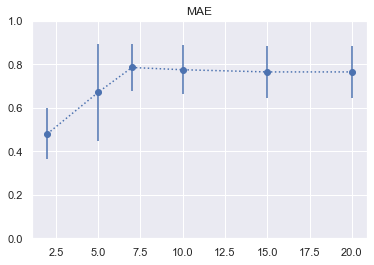

In [9]:
### Graficamos la curva de complejidad para el 'mae'.
mask_mae = results.param_criterion == 'mae'

plt.figure(0)
plt.title('MAE')
plt.ylim(0,1)
plt.errorbar(x=results[mask_mae].param_max_depth, y=results[mask_mae].mean_test_score,yerr=results[mask_mae].std_test_score,fmt='o:')

In [ ]:
### Plotea exactamente la misma curva que anter, pero para el caso de mse


<ErrorbarContainer object of 3 artists>

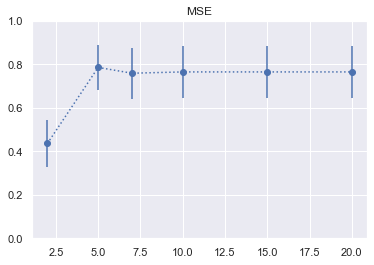

In [10]:
### RESPUESTA

mask_mse = results.param_criterion == 'mse'

plt.figure(1)
plt.title('MSE')
plt.ylim(0,1)
plt.errorbar(x=results[mask_mse].param_max_depth, y=results[mask_mse].mean_test_score,yerr=results[mask_mse].std_test_score,fmt='o:')

Que magnitudes son las que ploteaste? <br>
Que significa el error de cada curva? <br>
En que se parecen y en que se diferencian las curvas de arriba? De donde crees que vienen las diferencias? <br>
Plotearias algo que te ayude a comprobar tu hipotesis? <br>

In [11]:
### Descomenta e investiga algunas cosas.
### Podes ver mas funciones en la documentacion!

print(clf.best_estimator_)
print(clf.best_score_)

results.sort_values(by=['rank_test_score'],inplace=True)
print(results[['rank_test_score','mean_test_score','std_test_score','params']])


DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
0.7859973269666587
    rank_test_score  mean_test_score  std_test_score  \
7                 1         0.785997        0.103976   
2                 2         0.785547        0.106602   
3                 3         0.775179        0.113687   
9                 4         0.765159        0.118219   
4                 5         0.765154        0.118167   
5                 5         0.765154        0.118167   
10                5         0.765154        0.118167   
11                5         0.765154        0.118167   
8                 9         0.759187        0.116938   
1                10         0.671308        0.224001   
0          

Te parece razonable el modelo que elogio el Grid Search? O eligirias algun otro?

In [ ]:
### Una vez que hayas elegido el que pensas que es el mejor modelo, reporta tu estimacion de la performance 
### evaluando sobre el conjunto Held-out que separaste al principio.

## DESAFIO
Realiza el mismo procedimiento, pero esta vez implementando el algoritmo de regresion de KNN. <br>

Antes de empezar, pensa cuales son los hiperparametros que recorrerias con el Grid Search.

In [21]:
import warnings 
warnings.simplefilter('ignore')
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
%matplotlib inline